In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1. Loading Data

1. using pands library for loading data from drive


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/VD/archive/application_data.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(307511, 122)

##2. Data Exploration and Cleaning

Since the data is quite vast to perform the analysis in 1 day i have considered 10 imp columns of this data for performing EDA on it.

Below i have selected only the 10 columns as needed

In [5]:
columns_to_keep = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

New DataFrame created.

In [6]:
df_new = data[columns_to_keep]
df_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0


Printing the Shape of the dataframe

In [7]:
df_new.shape

(307511, 11)

In [8]:
#Checking for Null values in the dataset
null_values = df_new.isnull().sum()

# Display the null values
print("Null values in each column:")
print(null_values)

Null values in each column:
SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
CNT_CHILDREN            0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_ANNUITY            12
AMT_GOODS_PRICE       278
dtype: int64


Since there are few null values present in the data we are dropping them in the next step so the dataframe will have NO NULL values present.

In [9]:
# Dropping the NUll values in the Data
df_new.dropna(subset=['AMT_ANNUITY'], inplace=True)
df_new.dropna(subset=['AMT_GOODS_PRICE'], inplace=True)

<ipython-input-9-aaf59e5e7588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(subset=['AMT_ANNUITY'], inplace=True)
<ipython-input-9-aaf59e5e7588>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(subset=['AMT_GOODS_PRICE'], inplace=True)


In [10]:
#Checking for Null values in the dataset
null_values = df_new.isnull().sum()

# Displaying the null values
print("Null values in each column:")
print(null_values)

Null values in each column:
SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
dtype: int64


In [11]:
#New shape of the dataset
df_new.shape

(307221, 11)

decribing the data i.e it will show the mean, max, min and percentiles

In [12]:
print(df_new.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307221.000000  307221.000000  307221.000000      3.072210e+05   
mean   278170.730087       0.080737       0.416977      1.688326e+05   
std    102788.457585       0.272431       0.722047      2.372199e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189141.000000       0.000000       0.000000      1.125000e+05   
50%    278194.000000       0.000000       0.000000      1.485000e+05   
75%    367126.000000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  
count  3.072210e+05  307221.000000     3.072210e+05  
mean   5.993163e+05   27120.452357     5.383973e+05  
std    4.025196e+05   14492.106811     3.694484e+05  
min    4.500000e+04    1615.500000     4.050000e+04  
25%    2.700000e+05   16551.000000     2.385000e+05  
50%    5.146020e+05   24916

Info() function will show the data type for our reference of each column.

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SK_ID_CURR          307221 non-null  int64  
 1   TARGET              307221 non-null  int64  
 2   NAME_CONTRACT_TYPE  307221 non-null  object 
 3   CODE_GENDER         307221 non-null  object 
 4   FLAG_OWN_CAR        307221 non-null  object 
 5   FLAG_OWN_REALTY     307221 non-null  object 
 6   CNT_CHILDREN        307221 non-null  int64  
 7   AMT_INCOME_TOTAL    307221 non-null  float64
 8   AMT_CREDIT          307221 non-null  float64
 9   AMT_ANNUITY         307221 non-null  float64
 10  AMT_GOODS_PRICE     307221 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 28.1+ MB


##Exploratory Data Analysis (EDA):

Printing the heatmap of data

Plotting the heatmap for better visulization of correlation.

<ipython-input-14-4bddf507bf70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_new.corr()


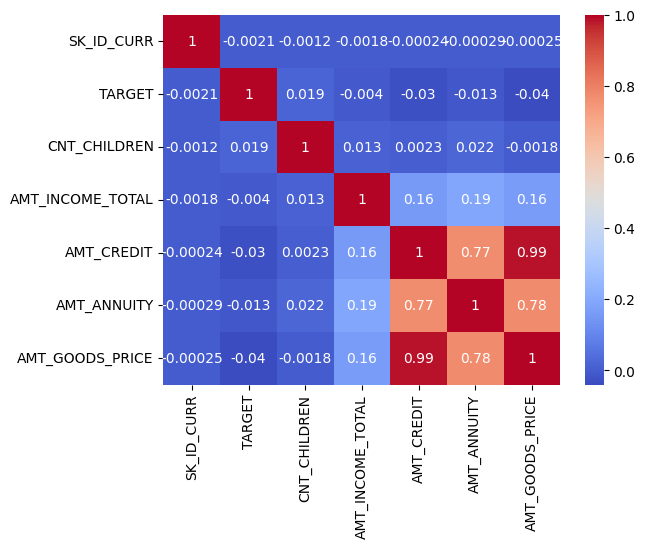

In [14]:
# Correlation heatmap
correlation_matrix = df_new.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

We can see that more number of females have taken loan compare to man which is approx 2:1 ratio of F:M.

<Axes: xlabel='CODE_GENDER', ylabel='count'>

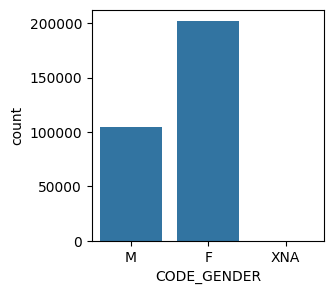

In [15]:
plt.figure(figsize=(3,3))
sns.countplot(data=df_new , x='CODE_GENDER')

More people have cash loans rather than Revolving loans

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

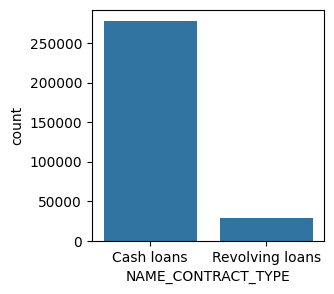

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(data=df_new , x='NAME_CONTRACT_TYPE')

Displaying the plot for better visulization of Target variables.

The below graph tells us that very few people have problem paying the loan comaprared to the overall count of the people.

<Axes: xlabel='TARGET', ylabel='count'>

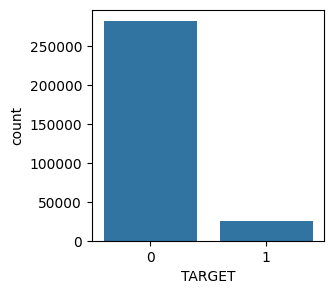

In [17]:
plt.figure(figsize=(3,3))
sns.countplot(data=df_new , x='TARGET')

In [18]:
ratio = df_new["TARGET"].value_counts()
print("Count of target is:\n", ratio )

print("The ratio for 0 : 1 target varibale is")
print(round(ratio[0]/ratio[1]),': 1')

Count of target is:
 0    282417
1     24804
Name: TARGET, dtype: int64
The ratio for 0 : 1 target varibale is
11 : 1


The below Scatter plot between the AMT_INCOME_TOTAL and AMT_CREDIT shows a poor correlation between both of them.

It shows that the amount credit is more than the INcome

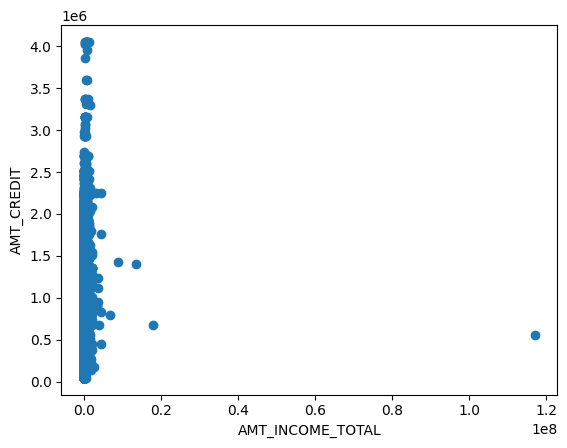

In [19]:
#Scatter plot for 'AMT_INCOME_TOTAL' vs 'AMT_CREDIT'
plt.scatter(df_new['AMT_INCOME_TOTAL'], df_new['AMT_CREDIT'])
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.show()

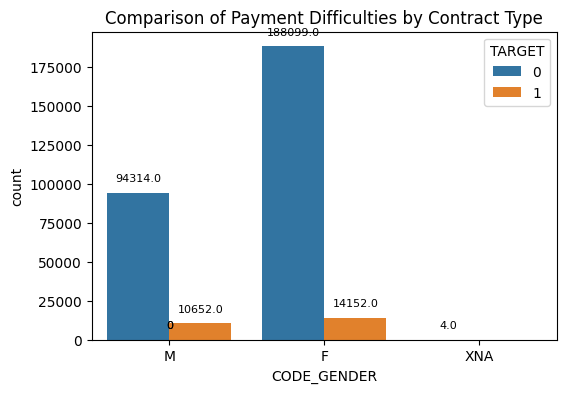

In [20]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='CODE_GENDER', hue='TARGET', data=df_new)

# Adding count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Comparison of Payment Difficulties by Contract Type')
plt.show()

In the above Graph we can see that the More MALEs are facing issues for repayment compare to the overall females who have quite less to their population.

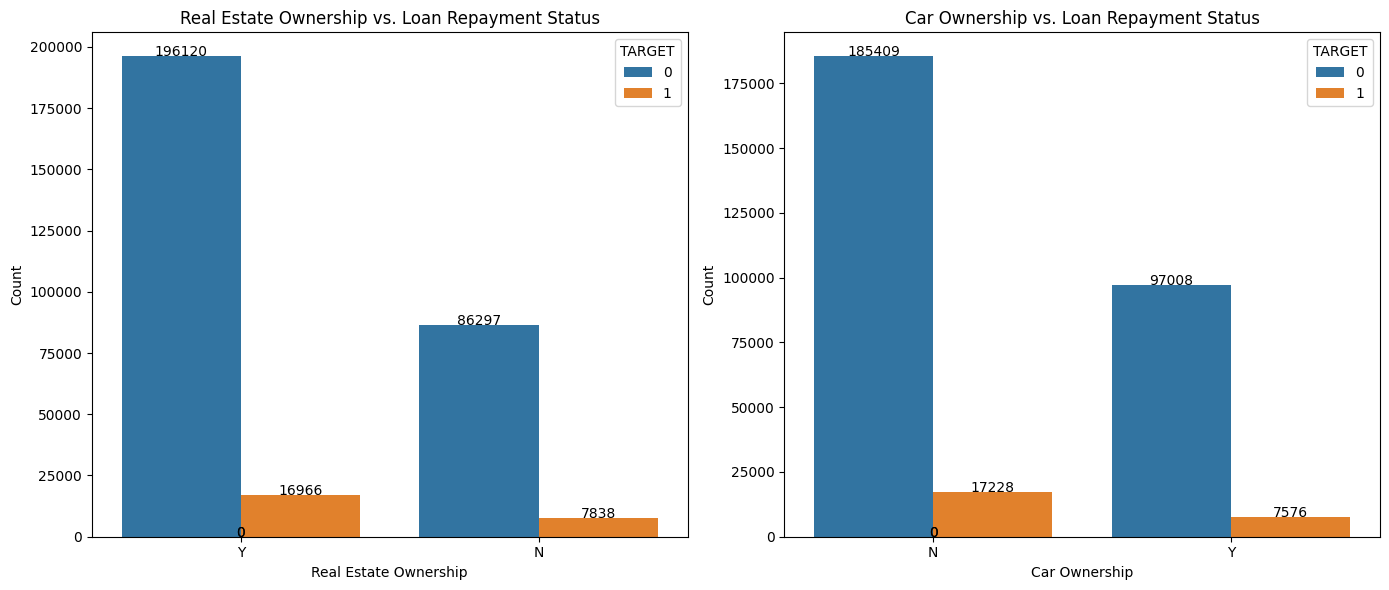

In [33]:
plt.figure(figsize=(14, 6))

# Plot for Real Estate Ownership vs. Loan Repayment Status
plt.subplot(1, 2, 1)
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=df_new)

# Add count annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', color='black', size=10)

plt.title('Real Estate Ownership vs. Loan Repayment Status')
plt.xlabel('Real Estate Ownership')
plt.ylabel('Count')

# Plot for Car Ownership vs. Loan Repayment Status
plt.subplot(1, 2, 2)
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=df_new)

# Add count annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', color='black', size=10)

plt.title('Car Ownership vs. Loan Repayment Status')
plt.xlabel('Car Ownership')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Based on the above grahps we can clearly see that the REAL ESTATE owners have a very high number of loans subscribers compare to the Car owners.

People who dont own car have higher number who have faced issues while repayment.

## Conclusion



*   A notable gender disparity is observed, with approximately a 11:1 ratio of female to male loan applicants. This demographic insight could be crucial for targeted marketing strategies or product customization.
*   The majority of applicants opt for cash loans over revolving loans, suggesting a preference for a fixed loan amount rather than a flexible credit line.
*   Contrary to concerns, a relatively low percentage of applicants face difficulties in repaying their loans. This is reassuring for the lending institution, indicating a generally reliable customer base.
*   The scatter plot between AMT_INCOME_TOTAL and AMT_CREDIT reveals a weak correlation, suggesting that loan amounts often exceed applicant incomes.
*   Further analysis indicates that a higher proportion of males encounter repayment issues compared to females. This insight is crucial for risk assessment and decision-making in loan approvals.
*   Real estate ownership significantly correlates with a higher number of loan subscriptions compared to car ownership. Understanding such patterns helps in tailoring loan products based on customer profiles.
*   Interestingly, individuals without car ownership appear more prone to repayment challenges, offering valuable insights for risk mitigation strategies.







Futhure we can proceed with ML Model building for much more better accuracy.

*   We can proceed with Classification algorithms like Random Forests, Gradient Boosting, or Logistic Regression which are well-suited for predicting loan repayment status.
*   By implementing ML model we can make informed and proactive decisions, thereby reducing the risk of default and optimizing the loan approval process